In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px


In [2]:
diabetes_data = load_diabetes()
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
X

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1   -0.039493 -0.068332 -0.092204  
2   -0.002592  0.002861 -0.025930  
3    0.034309  0.022688 -0.009362  
4   -0.002592 -0.031988 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018114  0.044485  
439 -0.011080 -0.046883  0.015491  
440  0.026560  0.044529 -0.025930  
441 -0.039493 -0.004222  0.003064  

[442 rows x 10 columns]

In [4]:
y = pd.Series(diabetes_data.target, name='Diabetes Progression')
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Diabetes Progression, Length: 442, dtype: float64

In [5]:
df = pd.concat([X, y], axis=1)
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Diabetes Progression  
0   -0.002592  0.019907 -0.017646                 151.0  
1   -0.039493 -0.068332 -0.092204                  75.0  
2   -0.002592  0.002861 -0.025930                 141.0  
3    0.034309  0.022688 -0.009362                 206.0  
4   -0.002592 -0.031988 -0.046641                 135.0  
..        ...       ...       ...                   ...  
437 -0.002592  0.031193  0.007207                 178.0  
438  0.034309 -0.018114  0.044485                 104.0  
439 -0.011080 -0.046883  0.015491                 132.0  
440  0.026560  0.044529 -0.025930                 220.0  
441 -0.039493 -0.004222  0.003064                  57.0  

[442 rows x 11 columns]

In [6]:
print(df.describe())


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [7]:
print(df.isnull().sum())

age                     0
sex                     0
bmi                     0
bp                      0
s1                      0
s2                      0
s3                      0
s4                      0
s5                      0
s6                      0
Diabetes Progression    0
dtype: int64


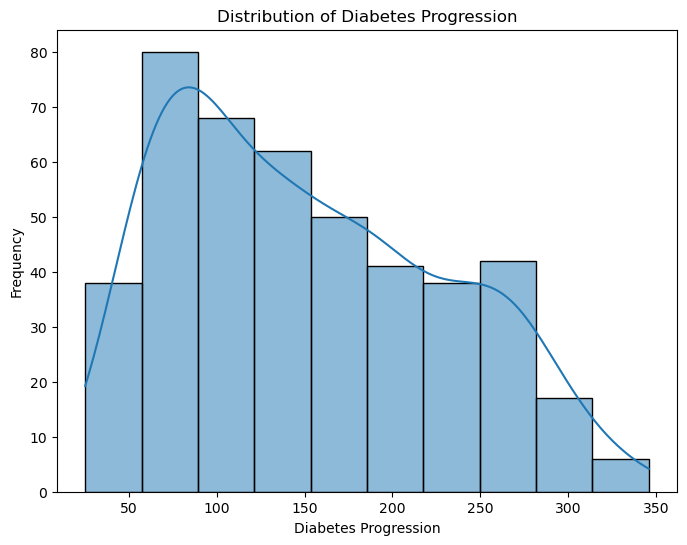

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Diabetes Progression'], kde=True)
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

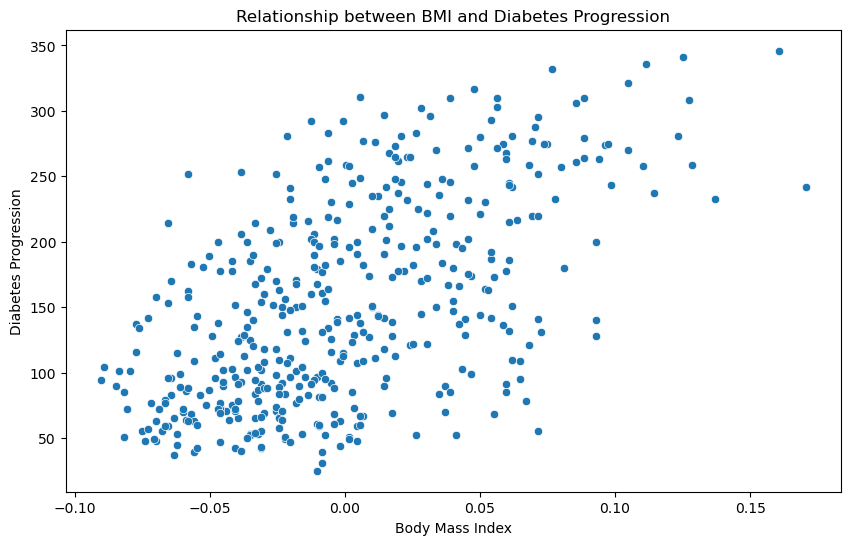

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='Diabetes Progression', data=df)
plt.title('Relationship between BMI and Diabetes Progression')
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Progression')
plt.show()

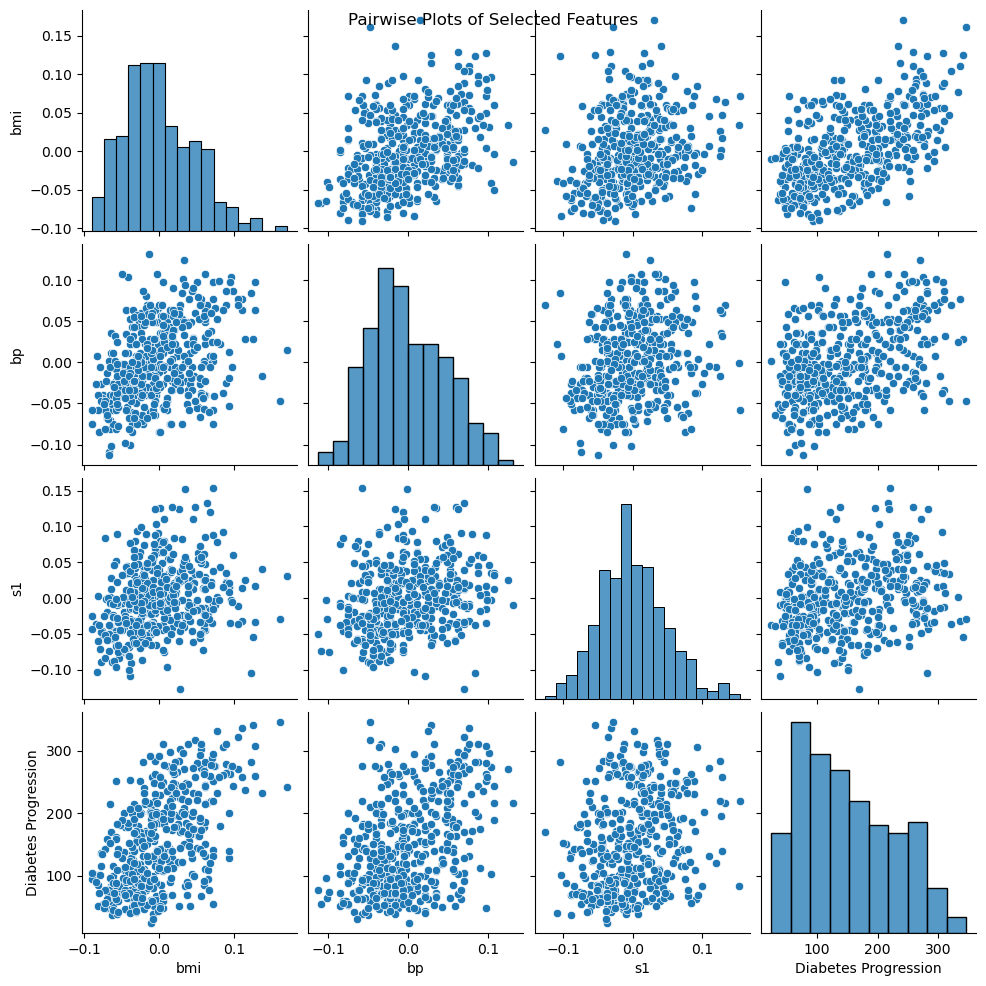

In [10]:
sns.pairplot(df[['bmi', 'bp', 's1', 'Diabetes Progression']])
plt.suptitle('Pairwise Plots of Selected Features')
plt.show()

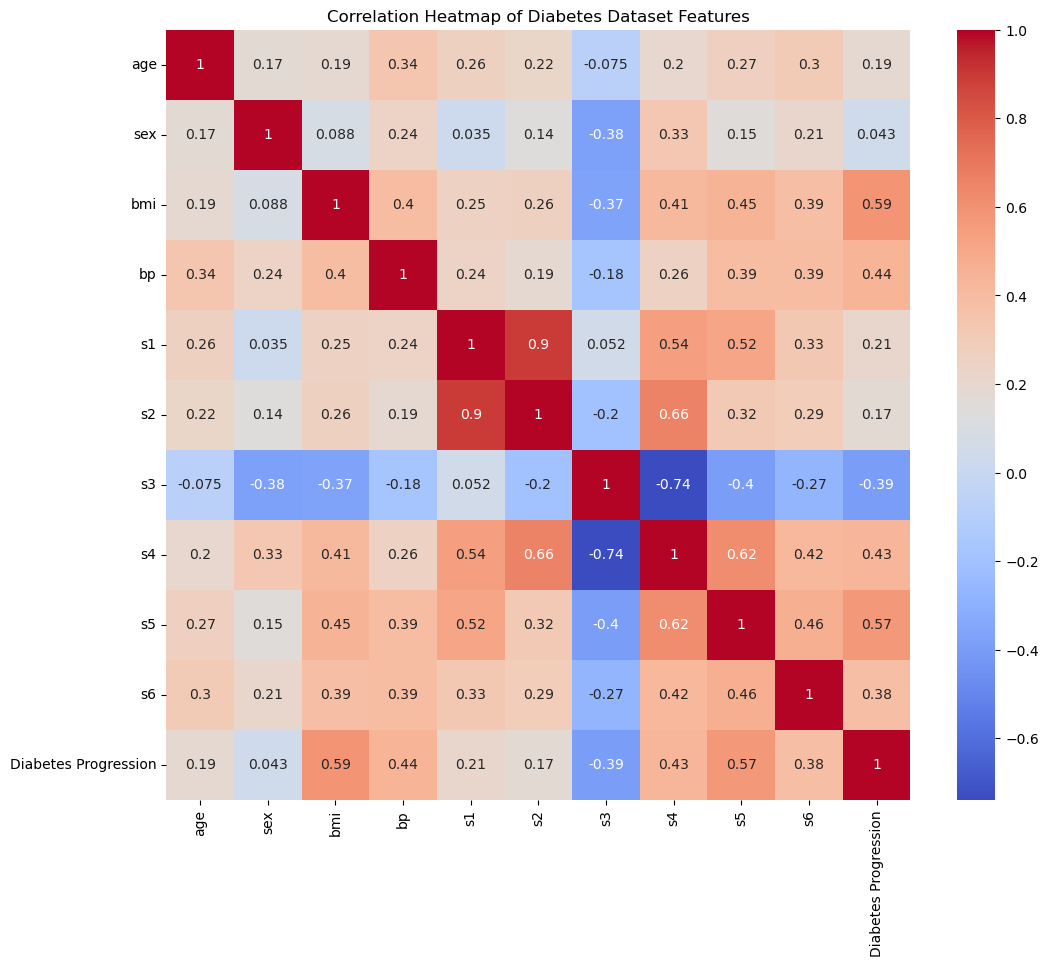

In [11]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.show()

In [12]:
fig = px.parallel_coordinates(df, color='Diabetes Progression',
                              dimensions=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=np.average(df['Diabetes Progression'], weights=df['bmi']))
fig.show()


C:\Users\Aditya Kudva\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['bmi']], df['Diabetes Progression'], test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination:', r2_score(y_test, y_pred))

Mean Squared Error: 4150.6801893299835
Coefficient of Determination: 0.19057346847560142


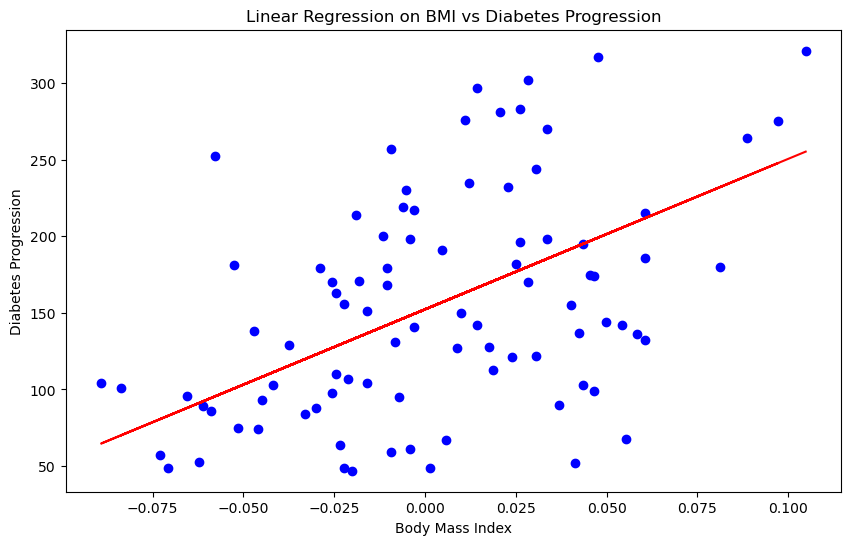

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression on BMI vs Diabetes Progression')
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Progression')
plt.show()

In [16]:
import plotly.express as px

In [17]:
fig = px.scatter_3d(df, x='bmi', y='bp', z='Diabetes Progression', color='Diabetes Progression')
fig.update_layout(title='3D Scatter Plot of BMI, BP, and Diabetes Progression',
                  scene=dict(xaxis_title='BMI',
                             yaxis_title='BP',
                             zaxis_title='Diabetes Progression'))
fig.show()

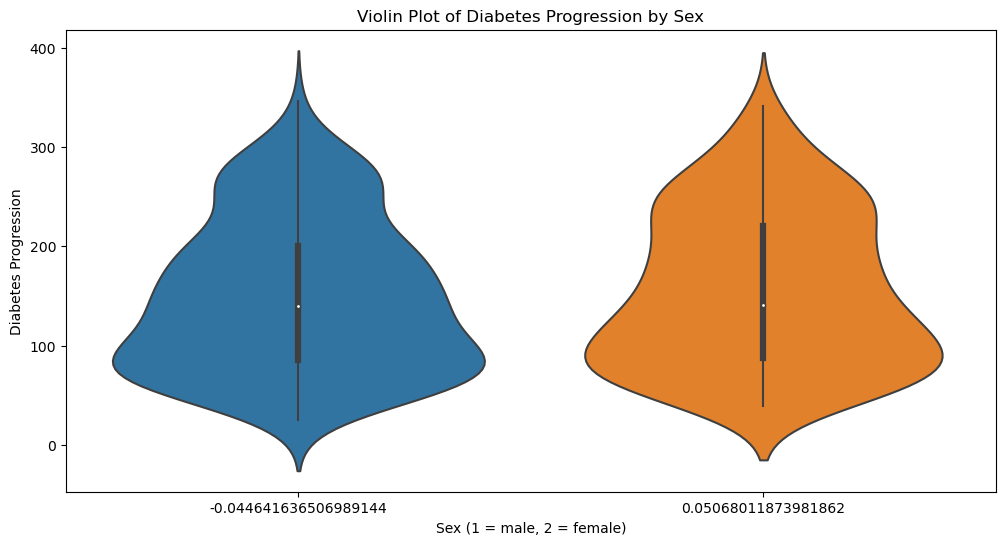

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='sex', y='Diabetes Progression', data=df)
plt.title('Violin Plot of Diabetes Progression by Sex')
plt.xlabel('Sex (1 = male, 2 = female)')
plt.ylabel('Diabetes Progression')
plt.show()


In [19]:
from scipy.stats import pearsonr

In [20]:
corr = df.corr()
pval = pd.DataFrame([[pearsonr(df[col], df[col2])[1] for col2 in df.columns] for col in df.columns], columns=df.columns, index=df.columns)

In [21]:
mask = np.triu(np.ones_like(corr, dtype=bool))
corr[mask] = np.nan

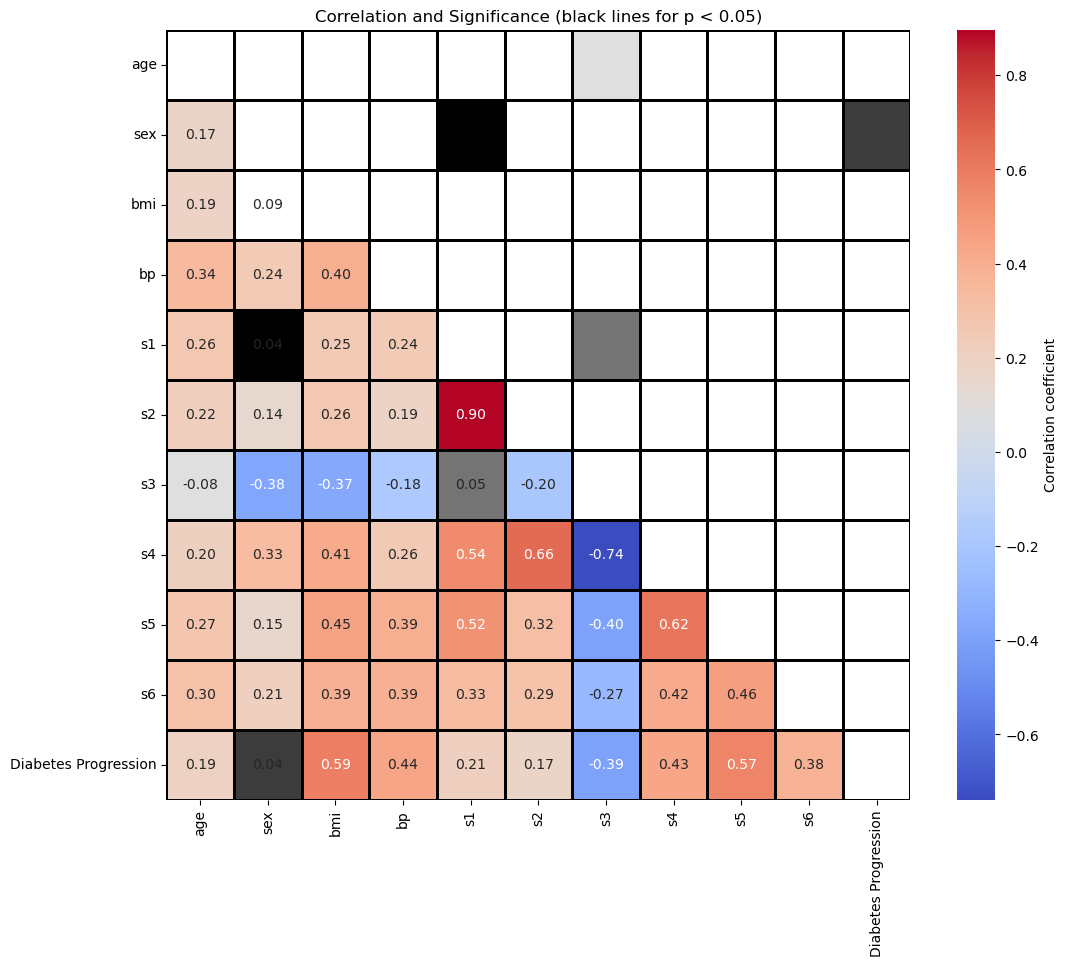

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
sns.heatmap(pval, mask=pval < 0.05, annot=False, cbar=False, cmap='binary', linewidths=1, linecolor='black')
plt.title('Correlation and Significance (black lines for p < 0.05)')
plt.show()

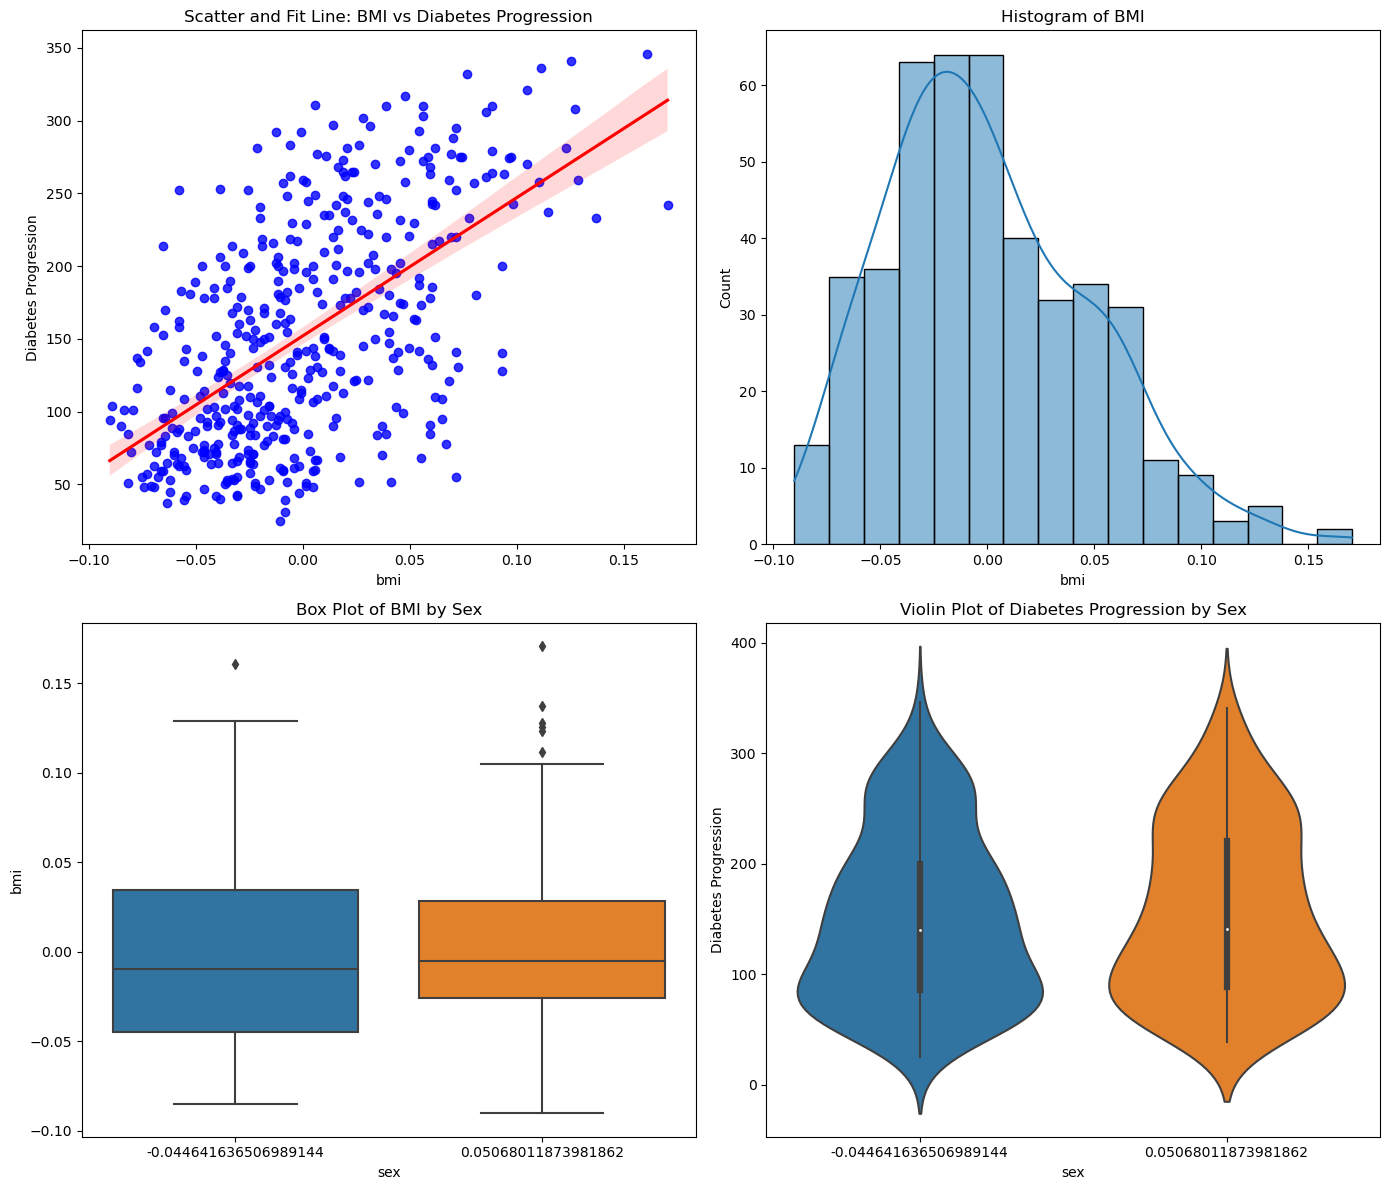

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.regplot(ax=axes[0, 0], x='bmi', y='Diabetes Progression', data=df, color='blue', line_kws={'color': 'red'})
axes[0, 0].set_title('Scatter and Fit Line: BMI vs Diabetes Progression')

sns.histplot(ax=axes[0, 1], data=df, x='bmi', kde=True)
axes[0, 1].set_title('Histogram of BMI')

sns.boxplot(ax=axes[1, 0], x='sex', y='bmi', data=df)
axes[1, 0].set_title('Box Plot of BMI by Sex')

sns.violinplot(ax=axes[1, 1], x='sex', y='Diabetes Progression', data=df)
axes[1, 1].set_title('Violin Plot of Diabetes Progression by Sex')
plt.tight_layout()
plt.show()
